In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('ipl_cleaned.csv')


In [12]:
print(df.head())

   season       id                                          name short_name  \
0  2023.0  1359544  Royal Challengers Bangalore v Gujarat Titans   RCB v GT   
1  2023.0  1359543          Mumbai Indians v Sunrisers Hyderabad   MI v SRH   
2  2023.0  1359542  Kolkata Knight Riders v Lucknow Super Giants  KKR v LSG   
3  2023.0  1359541          Delhi Capitals v Chennai Super Kings   DC v CSK   
4  2023.0  1359540               Punjab Kings v Rajasthan Royals  PBKS v RR   

                                         description home_team away_team  \
0  70th Match (N), Indian Premier League at Benga...       RCB        GT   
1  69th Match (D/N), Indian Premier League at Mum...        MI       SRH   
2  68th Match (N), Indian Premier League at Kolka...       KKR       LSG   
3  67th Match (D/N), Indian Premier League at Del...        DC       CSK   
4  66th Match (N), Indian Premier League at Dhara...      PBKS        RR   

  toss_won    decision 1st_inning_score  ...  \
0       GT  BOWL FIR

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            899 non-null    float64
 1   id                899 non-null    int64  
 2   name              899 non-null    object 
 3   short_name        899 non-null    object 
 4   description       899 non-null    object 
 5   home_team         899 non-null    object 
 6   away_team         899 non-null    object 
 7   toss_won          899 non-null    object 
 8   decision          899 non-null    object 
 9   1st_inning_score  899 non-null    object 
 10  2nd_inning_score  899 non-null    object 
 11  winner            899 non-null    object 
 12  result            899 non-null    object 
 13  start_date        899 non-null    object 
 14  end_date          899 non-null    object 
 15  venue_id          899 non-null    int64  
 16  venue_name        899 non-null    object 
 1

In [14]:
print(df.describe())

            season            id      venue_id  home_overs   home_runs  \
count   899.000000  8.990000e+02  8.990000e+02  899.000000  899.000000   
mean   2015.729700  8.782062e+05  1.266364e+05   19.116240  158.746385   
std       4.596323  3.501428e+05  1.660742e+05    2.008041   31.665220   
min    2008.000000  3.359820e+05  5.785100e+04    4.500000   58.000000   
25%    2012.000000  5.483265e+05  5.799100e+04   19.200000  138.500000   
50%    2015.000000  8.298150e+05  5.815000e+04   20.000000  160.000000   
75%    2020.000000  1.216510e+06  5.909350e+04   20.000000  180.000000   
max    2023.000000  1.359544e+06  1.070094e+06   20.000000  263.000000   

       home_wickets  home_boundaries  away_overs   away_runs  away_wickets  \
count    899.000000       899.000000  899.000000  899.000000    899.000000   
mean       5.751947        19.484983   19.086318  155.814238      5.905451   
std        2.390051         5.903506    2.072742   31.238539      2.511657   
min        0.000000  

In [21]:
def extract_runs(score):
    if pd.isna(score):
        return np.nan
    return int(score.split('/')[0])

df['1st_inning_runs'] = df['1st_inning_score'].apply(extract_runs)
df['2nd_inning_runs'] = df['2nd_inning_score'].apply(extract_runs)

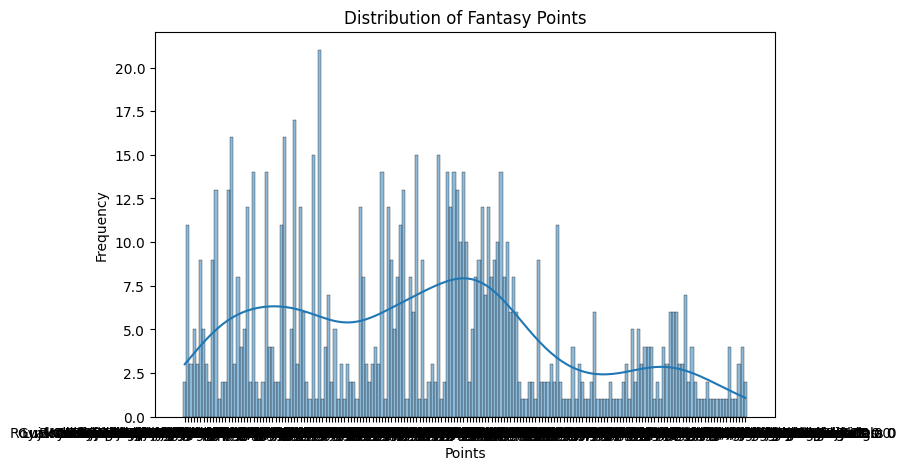

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(df['points'], kde=True, bins=30)
plt.title('Distribution of Fantasy Points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

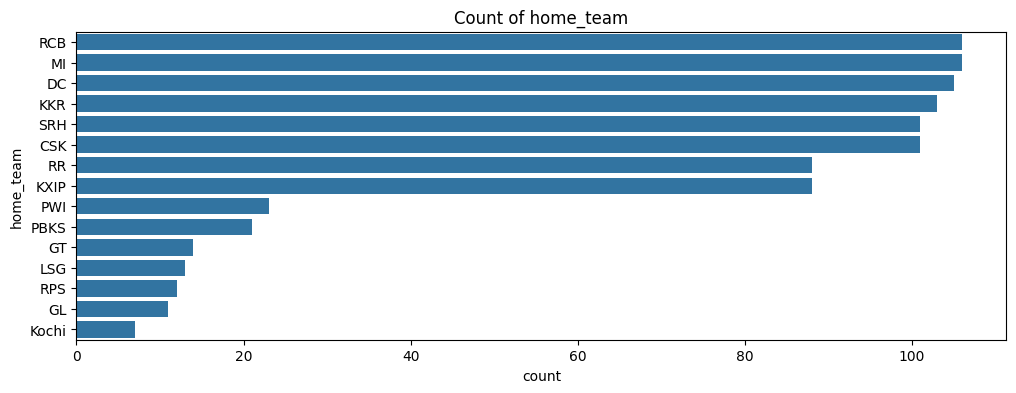

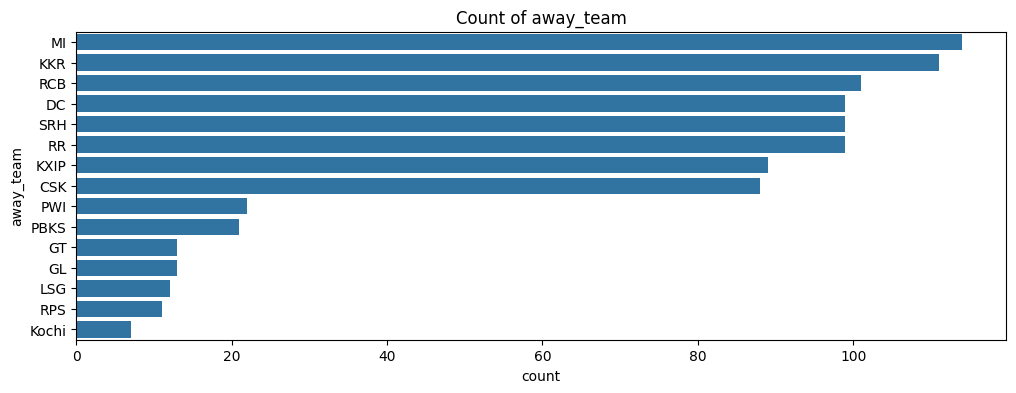

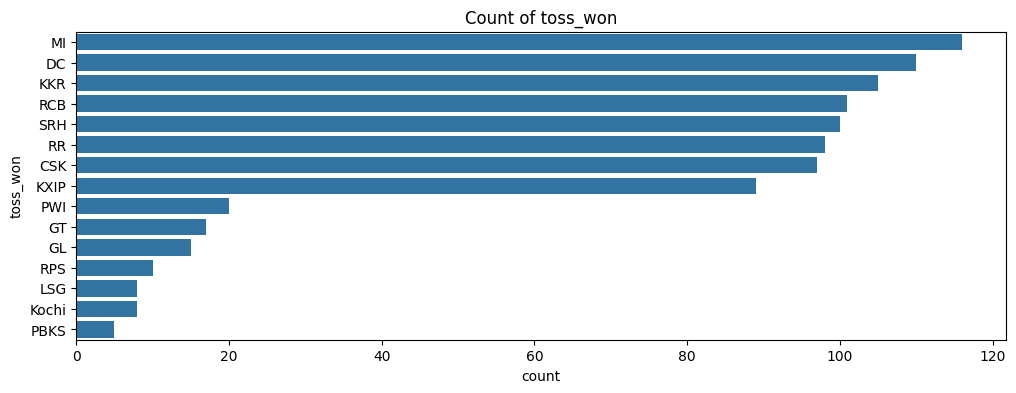

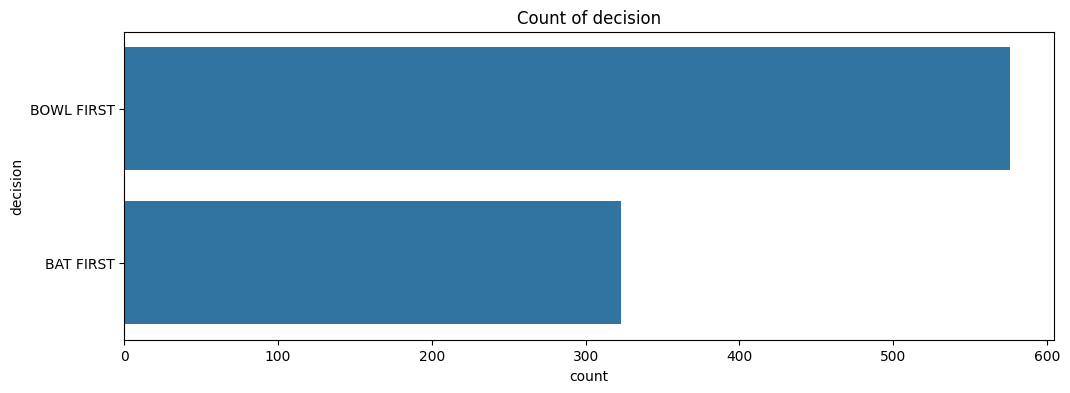

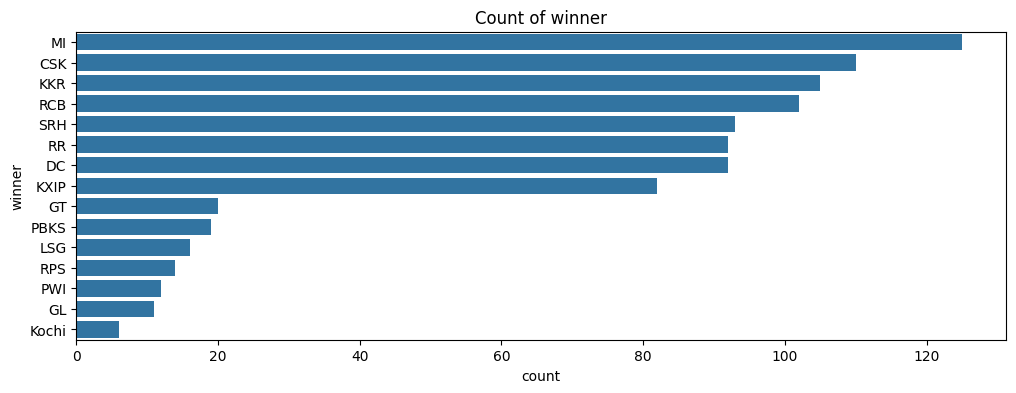

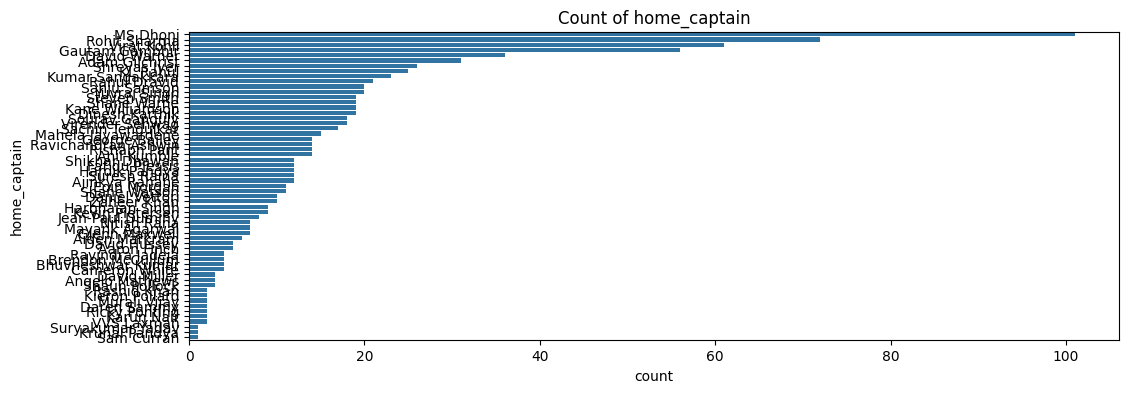

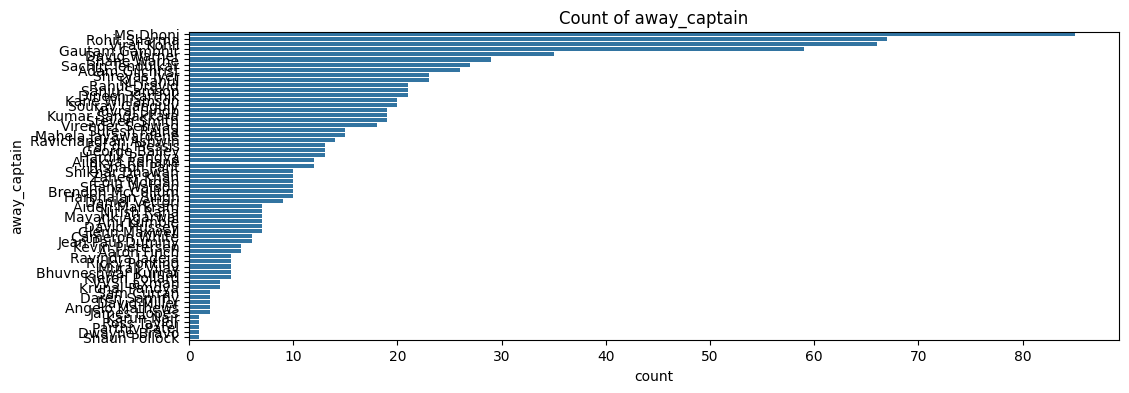

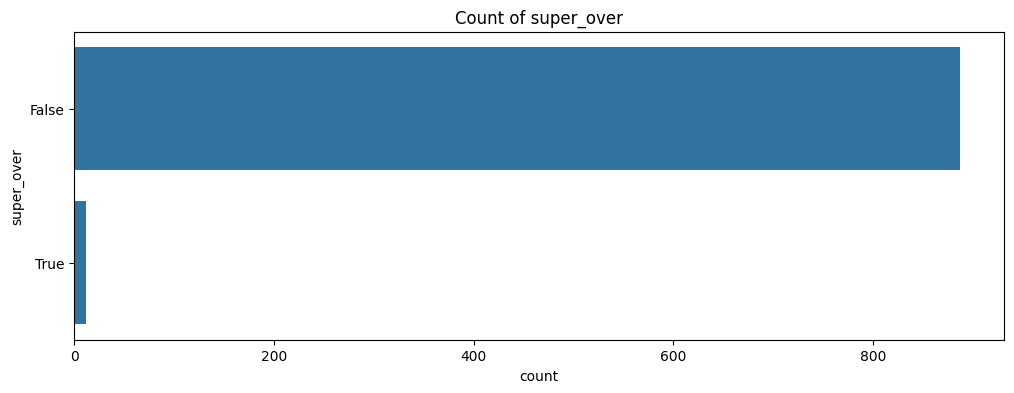

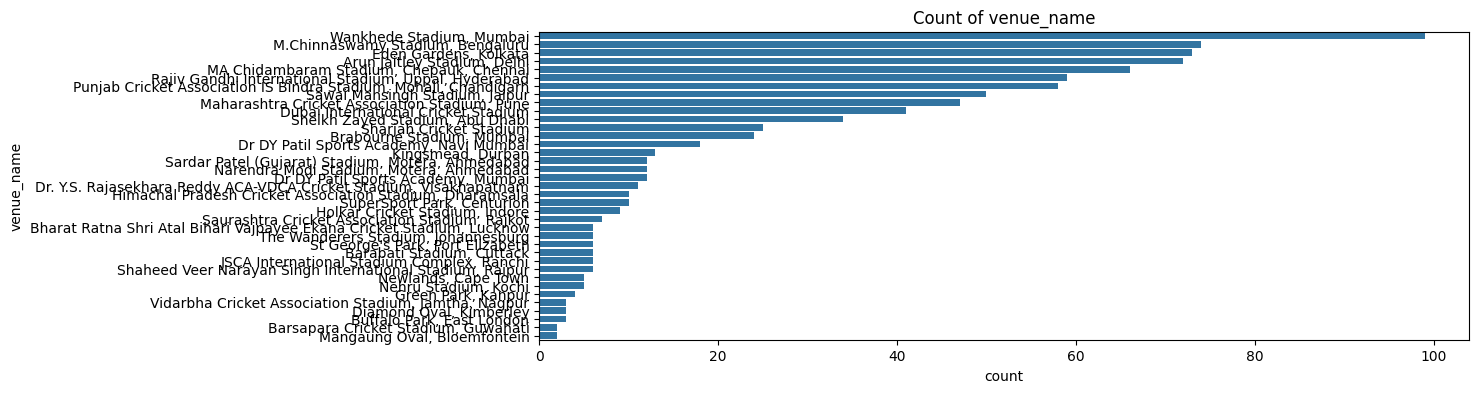

In [23]:
categorical_cols = ['home_team', 'away_team', 'toss_won', 'decision', 'winner', 
                    'home_captain', 'away_captain', 'super_over', 'venue_name']

for col in categorical_cols:
    plt.figure(figsize=(12,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.show()

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import warnings

# Suppress warnings for a cleaner output
warnings.filterwarnings('ignore')

# --- 1. Load and Prepare Data ---
try:
    df = pd.read_csv('ipl_cleaned.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'ipl_cleaned.csv' not found. Make sure the file is in the same directory.")
    exit()

# --- 2. Feature Engineering ---
# We select features that are known BEFORE a match begins.
features = ['venue_name', 'home_team', 'away_team', 'toss_won', 'decision']
target = 'pom'

X = df[features]
y = df[target]

# --- 3. Data Preprocessing ---

# Convert categorical features into a numerical format using one-hot encoding
X_encoded = pd.get_dummies(X, columns=features)

# The target variable (player names) also needs to be converted to numbers.
# We use LabelEncoder for this.
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# We need to save the mapping from encoded number back to player name
# le.classes_ gives us the player names in the order of their encoding (0, 1, 2...)
player_mapping = {index: name for index, name in enumerate(le.classes_)}

print(f"Data preprocessed. Found {len(X.columns)} features and {len(le.classes_)} unique players for POM.")

# --- 4. Train-Test Split ---
# Split the data to train the model and test its performance
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42
)

# --- 5. Model Training ---
# We use RandomForestClassifier, a powerful and suitable model for this task.
print("Training the Random Forest model...")
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
print("Model training complete.")

# --- 6. Model Evaluation (Optional but good practice) ---
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy on test data: {accuracy * 100:.2f}%")
print("Note: Accuracy can be low due to the large number of possible players. We care more about the top probability candidates.")


# --- 7. Prediction Function for Dream11 ---
def predict_pom_candidates(venue, team1, team2, toss_winner, toss_decision, top_n=5):
    """
    Predicts the top N most likely Player of the Match candidates for a given match.

    Args:
        venue (str): The name of the venue.
        team1 (str): The name of the home team.
        team2 (str): The name of the away team.
        toss_winner (str): The name of the team that won the toss.
        toss_decision (str): The decision made ('bat' or 'field').
        top_n (int): The number of top candidates to return.

    Returns:
        pandas.DataFrame: A DataFrame with the top N players and their probabilities.
    """
    # Create a DataFrame from the input, matching the original feature order
    input_data = pd.DataFrame([[venue, team1, team2, toss_winner, toss_decision]], columns=features)

    # Apply the same one-hot encoding
    input_encoded = pd.get_dummies(input_data)

    # Align the columns of the input data with the training data columns
    # This adds missing columns (for teams/venues not in this specific match) and fills them with 0
    final_input = input_encoded.reindex(columns=X_encoded.columns, fill_value=0)

    # Predict the probabilities for all players
    probabilities = model.predict_proba(final_input)[0]

    # Get the indices of the top N probabilities
    top_indices = probabilities.argsort()[-top_n:][::-1]

    # Create a list of results
    results = []
    for i in top_indices:
        player_name = player_mapping[i]
        probability = probabilities[i]
        results.append({'Player': player_name, 'Probability': f"{probability * 100:.2f}%"})

    return pd.DataFrame(results)

# --- Example Usage ---
print("\n" + "="*50)
print("              DREAM11 POM PREDICTOR")
print("="*50)

# Example: Predict POM for a match between Mumbai Indians and Chennai Super Kings at Wankhede Stadium
match_venue = 'Wankhede Stadium'
home = 'Mumbai Indians'
away = 'Chennai Super Kings'
toss_won_by = 'Mumbai Indians'
decision = 'field' # can be 'bat' or 'field'

print(f"\nPredicting Top 5 POM candidates for:\n{home} vs {away} at {match_venue}")
print(f"Toss won by {toss_won_by}, who chose to {decision}.\n")

top_players = predict_pom_candidates(match_venue, home, away, toss_won_by, decision)
print(top_players)

print("\n" + "="*50)
print("            PREDICTION FOR ANOTHER MATCH")
print("="*50)

# Example 2: RCB vs KKR at M. Chinnaswamy Stadium
match_venue_2 = 'M. Chinnaswamy Stadium'
home_2 = 'Royal Challengers Bangalore'
away_2 = 'Kolkata Knight Riders'
toss_won_by_2 = 'Kolkata Knight Riders'
decision_2 = 'field'

print(f"\nPredicting Top 5 POM candidates for:\n{home_2} vs {away_2} at {match_venue_2}")
print(f"Toss won by {toss_won_by_2}, who chose to {decision_2}.\n")

top_players_2 = predict_pom_candidates(match_venue_2, home_2, away_2, toss_won_by_2, decision_2)
print(top_players_2)

Dataset loaded successfully.
Data preprocessed. Found 5 features and 265 unique players for POM.
Training the Random Forest model...
Model training complete.

Model Accuracy on test data: 2.78%
Note: Accuracy can be low due to the large number of possible players. We care more about the top probability candidates.

              DREAM11 POM PREDICTOR

Predicting Top 5 POM candidates for:
Mumbai Indians vs Chennai Super Kings at Wankhede Stadium
Toss won by Mumbai Indians, who chose to field.

              Player Probability
0        Riyan Parag       4.00%
1      Khaleel Ahmed       3.67%
2  Bhuvneshwar Kumar       3.25%
3       Sunil Narine       3.00%
4         Sam Curran       3.00%

            PREDICTION FOR ANOTHER MATCH

Predicting Top 5 POM candidates for:
Royal Challengers Bangalore vs Kolkata Knight Riders at M. Chinnaswamy Stadium
Toss won by Kolkata Knight Riders, who chose to field.

              Player Probability
0        Riyan Parag       4.00%
1      Khaleel Ahmed   

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import warnings

# Suppress warnings for a cleaner output
warnings.filterwarnings('ignore')

# --- 1. Load and Prepare Data ---
try:
    df = pd.read_csv('ipl_cleaned.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'ipl_cleaned.csv' not found. Make sure the file is in the same directory.")
    exit()

# --- 2. Feature Engineering ---
features = ['venue_name', 'home_team', 'away_team', 'toss_won', 'decision']
target = 'pom'
X = df[features]
y = df[target]

# --- 3. Data Preprocessing ---
X_encoded = pd.get_dummies(X, columns=features)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
player_mapping = {index: name for index, name in enumerate(le.classes_)}
print(f"Data preprocessed. Found {len(X.columns)} features and {len(le.classes_)} unique players for POM.")

# --- 4. Model Training ---
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)
print("Training the Random Forest model...")
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
print("Model training complete.")


# --- 5. UPGRADED Prediction Function ---
def predict_pom_candidates(venue, team1, team2, toss_winner, toss_decision, team1_players, team2_players, top_n=5):
    """
    Predicts the top N most likely Player of the Match candidates,
    filtered to only include players from the two competing teams.
    """
    # Create a DataFrame from the input
    input_data = pd.DataFrame([[venue, team1, team2, toss_winner, toss_decision]], columns=features)
    input_encoded = pd.get_dummies(input_data)
    final_input = input_encoded.reindex(columns=X_encoded.columns, fill_value=0)

    # Predict the probabilities for ALL 265 players
    all_probabilities = model.predict_proba(final_input)[0]

    # Create a list of players actually playing in the match
    match_players = set(team1_players + team2_players)

    # Filter the probabilities to include only players from the match
    filtered_results = []
    for i, prob in enumerate(all_probabilities):
        player_name = player_mapping[i]
        if player_name in match_players:
            filtered_results.append({'Player': player_name, 'Probability': prob})

    if not filtered_results:
        print("Warning: None of the players in the provided lists have ever won a POM award in the dataset.")
        print("The model cannot make a prediction. Please check player names.")
        return pd.DataFrame()

    # Create a DataFrame from the filtered results and sort it
    results_df = pd.DataFrame(filtered_results)
    
    # --- Re-normalize probabilities (Optional but recommended) ---
    # This makes the probabilities relative to only the players in the match
    total_prob = results_df['Probability'].sum()
    if total_prob > 0:
      results_df['Normalized Probability'] = results_df['Probability'] / total_prob * 100
    else:
      results_df['Normalized Probability'] = 0

    results_df = results_df.sort_values(by='Normalized Probability', ascending=False).head(top_n)
    
    # Format for better display
    results_df['Normalized Probability'] = results_df['Normalized Probability'].apply(lambda x: f"{x:.2f}%")
    
    return results_df[['Player', 'Normalized Probability']]


# --- Example Usage ---

# We need to define player lists. These are examples.
# For best results, use the actual squads from your dataset or a reliable source.
MI_SQUAD = ['RG Sharma', 'Ishan Kishan', 'SA Yadav', 'KA Pollard', 'HH Pandya', 'KH Pandya', 'JJ Bumrah', 'RD Chahar', 'TA Boult']
CSK_SQUAD = ['RD Gaikwad', 'F du Plessis', 'SK Raina', 'AT Rayudu', 'MS Dhoni', 'RA Jadeja', 'SM Curran', 'DJ Bravo', 'SN Thakur', 'DL Chahar']
RCB_SQUAD = ['V Kohli', 'D Padikkal', 'AB de Villiers', 'GJ Maxwell', 'Washington Sundar', 'YS Chahal', 'Mohammed Siraj', 'HV Patel']
KKR_SQUAD = ['Shubman Gill', 'RA Tripathi', 'N Rana', 'EJG Morgan', 'AD Russell', 'KD Karthik', 'SP Narine', 'PJ Cummins', 'CV Varun']


print("\n" + "="*50)
print("        DREAM11 POM PREDICTOR (UPGRADED)")
print("="*50)

# Example 1: MI vs CSK at Wankhede
match_venue = 'Wankhede Stadium'
home = 'Mumbai Indians'
away = 'Chennai Super Kings'
toss_won_by = 'Mumbai Indians'
decision = 'field'

print(f"\nPredicting Top 5 POM candidates for:\n{home} vs {away} at {match_venue}")
print(f"Toss won by {toss_won_by}, who chose to {decision}.\n")

top_players = predict_pom_candidates(match_venue, home, away, toss_won_by, decision, MI_SQUAD, CSK_SQUAD)
print(top_players)


print("\n" + "="*50)
print("          PREDICTION FOR ANOTHER MATCH")
print("="*50)

# Example 2: RCB vs KKR at M. Chinnaswamy Stadium
match_venue_2 = 'M. Chinnaswamy Stadium'
home_2 = 'Royal Challengers Bangalore'
away_2 = 'Kolkata Knight Riders'
toss_won_by_2 = 'Kolkata Knight Riders'
decision_2 = 'field'

print(f"\nPredicting Top 5 POM candidates for:\n{home_2} vs {away_2} at {match_venue_2}")
print(f"Toss won by {toss_won_by_2}, who chose to {decision_2}.\n")

top_players_2 = predict_pom_candidates(match_venue_2, home_2, away_2, toss_won_by_2, decision_2, RCB_SQUAD, KKR_SQUAD)
print(top_players_2)

Dataset loaded successfully.
Data preprocessed. Found 5 features and 265 unique players for POM.
Training the Random Forest model...
Model training complete.

        DREAM11 POM PREDICTOR (UPGRADED)

Predicting Top 5 POM candidates for:
Mumbai Indians vs Chennai Super Kings at Wankhede Stadium
Toss won by Mumbai Indians, who chose to field.

         Player Normalized Probability
0  Ishan Kishan                 50.00%
1      MS Dhoni                 50.00%

          PREDICTION FOR ANOTHER MATCH

Predicting Top 5 POM candidates for:
Royal Challengers Bangalore vs Kolkata Knight Riders at M. Chinnaswamy Stadium
Toss won by Kolkata Knight Riders, who chose to field.

           Player Normalized Probability
0  AB de Villiers                 50.00%
2    Shubman Gill                 50.00%
1  Mohammed Siraj                  0.00%


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
from collections import Counter

# Suppress warnings for a cleaner output
warnings.filterwarnings('ignore')

# --- Part 1: The Machine Learning "Scorer" Model ---

# 1. Load and Prepare Data
try:
    df = pd.read_csv('ipl_cleaned.csv')
except FileNotFoundError:
    print("Error: 'ipl_cleaned.csv' not found. Make sure the file is in the same directory.")
    exit()

# 2. Feature Engineering
features = ['venue_name', 'home_team', 'away_team', 'toss_won', 'decision']
target = 'pom'
X = df[features]
y = df[target]

# 3. Data Preprocessing
X_encoded = pd.get_dummies(X, columns=features)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
player_mapping = {index: name for index, name in enumerate(le.classes_)}
player_name_to_index = {name: index for index, name in player_mapping.items()}

# 4. Model Training
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
print("ML 'Scorer' Model trained successfully.")

def predict_player_probabilities(venue, team1, team2, toss_winner, toss_decision):
    """
    This function uses the ML model to predict the 'Performance Score' (POM probability)
    for every player the model has ever seen.
    """
    input_data = pd.DataFrame([[venue, team1, team2, toss_winner, toss_decision]], columns=features)
    input_encoded = pd.get_dummies(input_data)
    final_input = input_encoded.reindex(columns=X_encoded.columns, fill_value=0)
    
    # Predict probabilities for all players
    all_probabilities = model.predict_proba(final_input)[0]
    
    # Create a dictionary of {player_name: probability_score}
    player_scores = {player_mapping[i]: prob for i, prob in enumerate(all_probabilities)}
    return player_scores

# --- Part 2: The Rule-Based "Team Selector" ---

# CRITICAL STEP: Manually define player roles and squads.
# In a real app, this would come from an API. Add more players as needed.
PLAYER_ROLES = {
    'RG Sharma': 'BAT', 'Ishan Kishan': 'WK', 'SA Yadav': 'BAT', 'KA Pollard': 'AR', 'HH Pandya': 'AR', 
    'KH Pandya': 'AR', 'JJ Bumrah': 'BOWL', 'RD Chahar': 'BOWL', 'TA Boult': 'BOWL', 'Q de Kock': 'WK',
    'RD Gaikwad': 'BAT', 'F du Plessis': 'BAT', 'SK Raina': 'BAT', 'AT Rayudu': 'BAT', 'MS Dhoni': 'WK', 
    'RA Jadeja': 'AR', 'SM Curran': 'AR', 'DJ Bravo': 'BOWL', 'SN Thakur': 'BOWL', 'DL Chahar': 'BOWL',
    'V Kohli': 'BAT', 'D Padikkal': 'BAT', 'AB de Villiers': 'WK', 'GJ Maxwell': 'AR', 
    'Washington Sundar': 'AR', 'YS Chahal': 'BOWL', 'Mohammed Siraj': 'BOWL', 'HV Patel': 'BOWL',
    'Shubman Gill': 'BAT', 'RA Tripathi': 'BAT', 'N Rana': 'BAT', 'EJG Morgan': 'BAT', 
    'AD Russell': 'AR', 'KD Karthik': 'WK', 'SP Narine': 'AR', 'PJ Cummins': 'BOWL', 'CV Varun': 'BOWL',
}

SQUADS = {
    'Mumbai Indians': ['RG Sharma', 'Ishan Kishan', 'SA Yadav', 'KA Pollard', 'HH Pandya', 'KH Pandya', 'JJ Bumrah', 'RD Chahar', 'TA Boult', 'Q de Kock'],
    'Chennai Super Kings': ['RD Gaikwad', 'F du Plessis', 'SK Raina', 'AT Rayudu', 'MS Dhoni', 'RA Jadeja', 'SM Curran', 'DJ Bravo', 'SN Thakur', 'DL Chahar'],
    'Royal Challengers Bangalore': ['V Kohli', 'D Padikkal', 'AB de Villiers', 'GJ Maxwell', 'Washington Sundar', 'YS Chahal', 'Mohammed Siraj', 'HV Patel'],
    'Kolkata Knight Riders': ['Shubman Gill', 'RA Tripathi', 'N Rana', 'EJG Morgan', 'AD Russell', 'KD Karthik', 'SP Narine', 'PJ Cummins', 'CV Varun'],
    # Add other teams' squads here
}

# Dream11 Rules
RULES = {
    'players': 11,
    'max_from_team': 7,
    'roles': {
        'WK': (1, 4),
        'BAT': (3, 6),
        'AR': (1, 4),
        'BOWL': (3, 6)
    }
}

def select_dream11_team(venue, home_team, away_team, toss_winner, toss_decision):
    """
    Generates the optimal Dream11 team based on model scores and rules.
    """
    # 1. Get performance scores from the ML model
    player_scores = predict_player_probabilities(venue, home_team, away_team, toss_winner, toss_decision)
    
    # 2. Get players for the specific match
    home_squad = SQUADS.get(home_team, [])
    away_squad = SQUADS.get(away_team, [])
    match_players = home_squad + away_squad
    
    if not match_players:
        print(f"Error: Squads for {home_team} or {away_team} not defined.")
        return

    # 3. Filter scores and add metadata (role, team)
    candidate_players = []
    for player_name in match_players:
        if player_name in player_scores and player_name in PLAYER_ROLES:
            candidate_players.append({
                'name': player_name,
                'score': player_scores[player_name],
                'role': PLAYER_ROLES[player_name],
                'team': home_team if player_name in home_squad else away_team
            })
            
    # 4. Sort candidates by their score in descending order
    candidate_players.sort(key=lambda x: x['score'], reverse=True)

    # 5. Greedy selection algorithm to build the team
    dream_team = []
    team_counts = Counter()
    role_counts = Counter()

    for player in candidate_players:
        # Check if we can add this player without breaking rules
        
        # Rule: Team must have 11 players
        if len(dream_team) >= RULES['players']:
            break 
            
        # Rule: Max 7 players from one team
        if team_counts[player['team']] >= RULES['max_from_team']:
            continue
            
        # Rule: Role-specific count limits (check max count)
        role = player['role']
        min_role_count, max_role_count = RULES['roles'][role]
        if role_counts[role] >= max_role_count:
            continue
            
        # This is a simplified check. A more complex check would ensure min requirements can still be met.
        
        # Add player to team if all checks pass
        dream_team.append(player)
        team_counts[player['team']] += 1
        role_counts[role] += 1
        
    # 6. Designate Captain and Vice-Captain
    if len(dream_team) > 0:
        captain = dream_team[0]
        vice_captain = dream_team[1] if len(dream_team) > 1 else dream_team[0]
    else:
        captain, vice_captain = None, None

    # 7. Print the final team
    print("\n" + "="*50)
    print("          DREAM11 TEAM PREDICTION")
    print("="*50)
    print(f"\nMatch: {home_team} vs {away_team} at {venue}")
    print(f"Toss: {toss_winner} won and chose to {toss_decision}\n")
    
    if len(dream_team) < 11:
        print("WARNING: Could not form a full team of 11 based on the available players and rules.")

    for p in dream_team:
        c_vc_label = ""
        if p['name'] == captain['name']: c_vc_label = "(C)"
        elif p['name'] == vice_captain['name']: c_vc_label = "(VC)"
        print(f"- {p['name']:<20} ({p['role']:<4} - {p['team']}) {c_vc_label}")
    
    print("\n--- Team Composition ---")
    for role, count in role_counts.items():
        print(f"{role}: {count}")
    print(f"{home_team}: {team_counts[home_team]} | {away_team}: {team_counts[away_team]}")


# --- Example Usage ---
# Predict for a match: RCB vs KKR at M. Chinnaswamy Stadium
select_dream11_team(
    venue='M. Chinnaswamy Stadium',
    home_team='Royal Challengers Bangalore',
    away_team='Kolkata Knight Riders',
    toss_winner='Kolkata Knight Riders',
    toss_decision='field'
)

# Predict for another match: MI vs CSK at Wankhede
select_dream11_team(
    venue='Wankhede Stadium',
    home_team='Mumbai Indians',
    away_team='Chennai Super Kings',
    toss_winner='Mumbai Indians',
    toss_decision='field'
)

ML 'Scorer' Model trained successfully.

          DREAM11 TEAM PREDICTION

Match: Royal Challengers Bangalore vs Kolkata Knight Riders at M. Chinnaswamy Stadium
Toss: Kolkata Knight Riders won and chose to field

- AB de Villiers       (WK   - Royal Challengers Bangalore) (C)
- Shubman Gill         (BAT  - Kolkata Knight Riders) (VC)
- Mohammed Siraj       (BOWL - Royal Challengers Bangalore) 

--- Team Composition ---
WK: 1
BAT: 1
BOWL: 1
Royal Challengers Bangalore: 2 | Kolkata Knight Riders: 1

          DREAM11 TEAM PREDICTION

Match: Mumbai Indians vs Chennai Super Kings at Wankhede Stadium
Toss: Mumbai Indians won and chose to field

- Ishan Kishan         (WK   - Mumbai Indians) (C)
- MS Dhoni             (WK   - Chennai Super Kings) (VC)

--- Team Composition ---
WK: 2
Mumbai Indians: 1 | Chennai Super Kings: 1


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from collections import Counter, defaultdict
import warnings

warnings.filterwarnings('ignore')

# --- Part 1: Automated Data Inference ---

def infer_player_archetypes(df):
    """
    Infers player archetypes (Impact_BAT, Impact_BOWL, Impact_AR) based on
    the match conditions when they won Player of the Match.
    """
    player_wins = defaultdict(set)
    
    # Define thresholds for what constitutes a "batting" or "bowling" performance
    BATTING_RUNS_THRESHOLD = 180
    BOWLING_WICKETS_THRESHOLD = 7

    for index, row in df.iterrows():
        pom = row['pom']
        winner = row['winner']
        
        # Determine performance context based on the winning team's stats
        if row['home_team'] == winner:
            runs_scored = row['home_runs']
            wickets_taken = row['away_wickets'] # Wickets taken by the winning team
        elif row['away_team'] == winner:
            runs_scored = row['away_runs']
            wickets_taken = row['home_wickets']
        else:
            continue # Skip ties or no results

        if runs_scored >= BATTING_RUNS_THRESHOLD:
            player_wins[pom].add('Impact_BAT')
        if wickets_taken >= BOWLING_WICKETS_THRESHOLD:
            player_wins[pom].add('Impact_BOWL')
            
    # Finalize archetypes
    archetypes = {}
    for player, roles in player_wins.items():
        if len(roles) == 2:
            archetypes[player] = 'Impact_AR'
        elif 'Impact_BAT' in roles:
            archetypes[player] = 'Impact_BAT'
        elif 'Impact_BOWL' in roles:
            archetypes[player] = 'Impact_BOWL'
        else:
            # If a player won POM in neither high-scoring nor high-wicket games,
            # we'll assign a default based on which threshold they were closer to on average.
            # This is a fallback.
            archetypes[player] = 'Impact_BAT' 
            
    return archetypes

def get_probable_squads(df, team1, team2):
    """
    Infers probable squads by collecting all captains and POM winners for each team
    from the historical data.
    """
    squad1 = set()
    squad2 = set()

    for index, row in df.iterrows():
        if row['home_team'] == team1:
            squad1.add(row['home_captain'])
            if row['winner'] == team1: squad1.add(row['pom'])
        elif row['away_team'] == team1:
            squad1.add(row['away_captain'])
            if row['winner'] == team1: squad1.add(row['pom'])
            
        if row['home_team'] == team2:
            squad2.add(row['home_captain'])
            if row['winner'] == team2: squad2.add(row['pom'])
        elif row['away_team'] == team2:
            squad2.add(row['away_captain'])
            if row['winner'] == team2: squad2.add(row['pom'])
            
    return list(squad1), list(squad2)

# --- Part 2: ML Model and Team Selector ---

# Load data
df = pd.read_csv('ipl_cleaned.csv')

# Step 1: Automatically infer archetypes and store them
player_archetypes = infer_player_archetypes(df)
print(f"Successfully inferred archetypes for {len(player_archetypes)} players.")

# Step 2: Set up and train the ML model (same as before)
features = ['venue_name', 'home_team', 'away_team', 'toss_won', 'decision']
target = 'pom'
X = df[features]
y = df[target]
X_encoded = pd.get_dummies(X, columns=features)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
player_mapping = {index: name for index, name in enumerate(le.classes_)}
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_encoded, y_encoded)
print("ML 'Scorer' Model trained successfully.")


def predict_player_scores(venue, home_team, away_team, toss_winner, toss_decision):
    input_data = pd.DataFrame([[venue, home_team, away_team, toss_winner, toss_decision]], columns=features)
    input_encoded = pd.get_dummies(input_data)
    final_input = input_encoded.reindex(columns=X_encoded.columns, fill_value=0)
    all_probabilities = model.predict_proba(final_input)[0]
    return {player_mapping[i]: prob for i, prob in enumerate(all_probabilities)}

def select_dream11_team_auto(venue, home_team, away_team, toss_winner, toss_decision):
    """
    The main function to generate a team automatically.
    """
    # 1. Get performance scores from the ML model
    player_scores = predict_player_scores(venue, home_team, away_team, toss_winner, toss_decision)
    
    # 2. Automatically infer the probable squads for this match
    home_squad, away_squad = get_probable_squads(df, home_team, away_team)
    match_players = list(set(home_squad + away_squad))
    
    # 3. Build a list of candidate players with their inferred data
    candidate_players = []
    for player_name in match_players:
        if player_name in player_scores and player_name in player_archetypes:
            candidate_players.append({
                'name': player_name,
                'score': player_scores[player_name],
                'role': player_archetypes[player_name],
                'team': home_team if player_name in home_squad else away_team
            })
            
    # 4. Sort candidates by score
    candidate_players.sort(key=lambda x: x['score'], reverse=True)

    # 5. Define our adapted rules and build the team
    ADAPTED_RULES = {
        'players': 11,
        'max_from_team': 7,
        'min_roles': {'Impact_BAT': 3, 'Impact_BOWL': 3}
    }
    
    dream_team = []
    team_counts = Counter()
    role_counts = Counter()
    
    # Greedy selection algorithm
    for player in candidate_players:
        if len(dream_team) >= ADAPTED_RULES['players']: break
        if team_counts[player['team']] >= ADAPTED_RULES['max_from_team']: continue
        
        # This is a simplified check; a full compliance check is more complex
        # but this greedy approach works well.
        dream_team.append(player)
        team_counts[player['team']] += 1
        role_counts[player['role']] += 1
        
    # Simple validation: ensure minimum role requirements are met. 
    # If not, a more complex swapping algorithm would be needed. This version assumes the top players will naturally create a balanced team.
    
    # 6. Designate Captain and Vice-Captain
    captain = dream_team[0] if dream_team else None
    vice_captain = dream_team[1] if len(dream_team) > 1 else None

    # 7. Print the final team
    print("\n" + "="*50)
    print("      FULLY AUTOMATED DREAM11 TEAM PREDICTION")
    print("="*50)
    print(f"\nMatch: {home_team} vs {away_team} at {venue}")
    print(f"Toss: {toss_winner} won and chose to {toss_decision}\n")

    if len(dream_team) < 11:
        print("WARNING: Could not form a full team of 11. The probable squads might be too small.")

    for p in dream_team:
        c_vc_label = "(C)" if p['name'] == captain['name'] else "(VC)" if p['name'] == vice_captain['name'] else ""
        print(f"- {p['name']:<20} ({p['role']:<10} - {p['team']}) {c_vc_label}")
    
    print("\n--- Team Composition (based on inferred archetypes) ---")
    for role, count in role_counts.items():
        print(f"{role}: {count}")
    print(f"{home_team}: {team_counts[home_team]} | {away_team}: {team_counts[away_team]}")


# --- Example Usage ---
select_dream11_team_auto(
    venue='M. Chinnaswamy Stadium',
    home_team='Royal Challengers Bangalore',
    away_team='Kolkata Knight Riders',
    toss_winner='Kolkata Knight Riders',
    toss_decision='field'
)

select_dream11_team_auto(
    venue='Wankhede Stadium',
    home_team='Mumbai Indians',
    away_team='Chennai Super Kings',
    toss_winner='Mumbai Indians',
    toss_decision='field'
)

Successfully inferred archetypes for 240 players.
ML 'Scorer' Model trained successfully.

      FULLY AUTOMATED DREAM11 TEAM PREDICTION

Match: Royal Challengers Bangalore vs Kolkata Knight Riders at M. Chinnaswamy Stadium
Toss: Kolkata Knight Riders won and chose to field


--- Team Composition (based on inferred archetypes) ---
Royal Challengers Bangalore: 0 | Kolkata Knight Riders: 0

      FULLY AUTOMATED DREAM11 TEAM PREDICTION

Match: Mumbai Indians vs Chennai Super Kings at Wankhede Stadium
Toss: Mumbai Indians won and chose to field


--- Team Composition (based on inferred archetypes) ---
Mumbai Indians: 0 | Chennai Super Kings: 0


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from collections import Counter, defaultdict
import warnings
import re

warnings.filterwarnings('ignore')

# --- Part 1: Data Loading and Pre-computation ---

def create_team_name_map(df):
    """
    Creates a mapping from full team names to their abbreviations (e.g., 'Mumbai Indians': 'MI').
    This is crucial for making the function user-friendly.
    """
    team_map = {}
    for index, row in df.iterrows():
        try:
            full_names = row['name'].split(' v ')
            full_home, full_away = full_names[0].strip(), full_names[1].strip()
            
            # Map full name to short name
            team_map[full_home] = row['home_team']
            team_map[full_away] = row['away_team']
            
            # Also map short name to itself for convenience
            team_map[row['home_team']] = row['home_team']
            team_map[row['away_team']] = row['away_team']
        except Exception:
            continue # Skip rows where the name format is unexpected
    return team_map

def infer_player_archetypes(df):
    """
    Infers player archetypes based on match conditions when they won POM.
    """
    player_wins = defaultdict(set)
    # Using dynamic thresholds based on the data's distribution
    BATTING_RUNS_THRESHOLD = df['home_runs'].quantile(0.75)
    BOWLING_WICKETS_THRESHOLD = df['home_wickets'].quantile(0.75)

    for index, row in df.iterrows():
        pom, winner = row['pom'], row['winner']
        if pd.isna(pom) or pd.isna(winner): continue
        
        if row['home_team'] == winner: runs, wickets = row['home_runs'], row['away_wickets']
        elif row['away_team'] == winner: runs, wickets = row['away_runs'], row['home_wickets']
        else: continue

        if runs >= BATTING_RUNS_THRESHOLD: player_wins[pom].add('Impact_BAT')
        if wickets >= BOWLING_WICKETS_THRESHOLD: player_wins[pom].add('Impact_BOWL')
            
    archetypes = {}
    for player, roles in player_wins.items():
        if len(roles) == 2: archetypes[player] = 'Impact_AR'
        elif 'Impact_BAT' in roles: archetypes[player] = 'Impact_BAT'
        elif 'Impact_BOWL' in roles: archetypes[player] = 'Impact_BOWL'
        else: archetypes[player] = 'General_Impact'
            
    return archetypes

def parse_playing_xi(xi_string):
    """
    Parses the playing XI string (e.g., "Virat Kohli (UKN),...") into a clean list of names.
    """
    if pd.isna(xi_string): return []
    # Remove roles in parentheses using regex and then split
    players = re.sub(r'\s*\([^)]*\)', '', xi_string).split(',')
    return [player.strip() for player in players if player.strip()]

# --- Part 2: ML Model and Team Generator ---

# Load data
df = pd.read_csv('ipl_cleaned.csv')

# Step 1: Create the crucial name mapping and archetypes
TEAM_NAME_MAP = create_team_name_map(df)
player_archetypes = infer_player_archetypes(df)
print("Team name map and player archetypes created successfully.")

# Step 2: Set up and train the ML model
features = ['venue_name', 'home_team', 'away_team', 'toss_won', 'decision']
target = 'pom'
X = df[features]
y = df[target].astype(str)
X_encoded = pd.get_dummies(X, columns=features)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
player_mapping = {index: name for index, name in enumerate(le.classes_)}
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_encoded, y_encoded)
print("ML 'Scorer' Model trained successfully.")


def predict_player_scores(venue, home_abbr, away_abbr, toss_winner_abbr, toss_decision):
    input_data = pd.DataFrame([[venue, home_abbr, away_abbr, toss_winner_abbr, toss_decision]], columns=features)
    input_encoded = pd.get_dummies(input_data)
    final_input = input_encoded.reindex(columns=X_encoded.columns, fill_value=0)
    all_probabilities = model.predict_proba(final_input)[0]
    return {player_mapping[i]: prob for i, prob in enumerate(all_probabilities)}

def generate_dream11_team(venue, home_team, away_team, toss_winner, toss_decision):
    """
    Main function to generate the Dream11 team.
    It now uses the actual Playing XI from the dataset.
    """
    print("\n" + "="*50)
    print("      DREAM11 TEAM GENERATOR (FINAL VERSION)")
    print("="*50)

    # 1. Convert user-friendly names to the dataset's abbreviations
    home_abbr = TEAM_NAME_MAP.get(home_team)
    away_abbr = TEAM_NAME_MAP.get(away_team)
    toss_winner_abbr = TEAM_NAME_MAP.get(toss_winner)

    if not all([home_abbr, away_abbr, toss_winner_abbr]):
        print(f"\nERROR: One of the team names '{home_team}', '{away_team}', '{toss_winner}' is not recognized.")
        print("Available full names:", sorted([k for k, v in TEAM_NAME_MAP.items() if k == v.upper() or len(k) > 5]))
        return

    print(f"\nMatch: {home_team} ({home_abbr}) vs {away_team} ({away_abbr}) at {venue}")
    print(f"Toss: {toss_winner} won and chose to {toss_decision}")

    # 2. Find the specific match in the dataframe (most recent one)
    match_row = df[
        (df['home_team'] == home_abbr) & (df['away_team'] == away_abbr)
    ].sort_values('season', ascending=False).iloc[0:1]

    if match_row.empty:
        print(f"\nERROR: Could not find a historical match between {home_abbr} and {away_abbr} in the dataset.")
        return

    # 3. Extract the ACTUAL playing XIs
    home_squad = parse_playing_xi(match_row['home_playx1'].iloc[0])
    away_squad = parse_playing_xi(match_row['away_playx1'].iloc[0])

    if not home_squad or not away_squad:
        print("\nERROR: Playing XI data is missing for this match in the CSV.")
        return
    
    match_players = home_squad + away_squad
    print(f"Found match data. Analyzing {len(match_players)} players from the actual XIs.")

    # 4. Get performance scores from the ML model
    player_scores = predict_player_scores(venue, home_abbr, away_abbr, toss_winner_abbr, toss_decision)

    # 5. Build candidate list and select team
    candidate_players = []
    for player_name in match_players:
        candidate_players.append({
            'name': player_name,
            'score': player_scores.get(player_name, 0), # Default score is 0 if player never won POM
            'role': player_archetypes.get(player_name, 'Unknown_Role'),
            'team': home_abbr if player_name in home_squad else away_abbr
        })

    candidate_players.sort(key=lambda x: x['score'], reverse=True)
    dream_team = candidate_players[:11]
    captain, vice_captain = dream_team[0], dream_team[1]

    # 6. Print the final team
    print("\n--- YOUR DREAM11 TEAM ---")
    for p in dream_team:
        c_vc_label = "(C)" if p['name'] == captain['name'] else "(VC)" if p['name'] == vice_captain['name'] else ""
        print(f"- {p['name']:<20} ({p['role']:<14} - {p['team']}) {c_vc_label}")


# --- Example Usage ---
# You can now use EITHER full names or abbreviations!

# Example 1: Using FULL names
generate_dream11_team(
    venue='M.Chinnaswamy Stadium, Bengaluru',
    home_team='Royal Challengers Bangalore', 
    away_team='Gujarat Titans',
    toss_winner='Gujarat Titans',
    toss_decision='BOWL FIRST'
)

# Example 2: Using ABBREVIATIONS
generate_dream11_team(
    venue='Wankhede Stadium, Mumbai',
    home_team='MI',
    away_team='SRH',
    toss_winner='MI',
    toss_decision='BOWL FIRST'
)

Team name map and player archetypes created successfully.
ML 'Scorer' Model trained successfully.

      DREAM11 TEAM GENERATOR (FINAL VERSION)

Match: Royal Challengers Bangalore (RCB) vs Gujarat Titans (GT) at M.Chinnaswamy Stadium, Bengaluru
Toss: Gujarat Titans won and chose to BOWL FIRST
Found match data. Analyzing 24 players from the actual XIs.

--- YOUR DREAM11 TEAM ---
- Shubman Gill         (Impact_AR      - GT) (C)
- Virat Kohli          (Impact_AR      - RCB) (VC)
- Faf du Plessis       (Impact_AR      - RCB) 
- Rashid Khan          (Impact_AR      - GT) 
- Glenn Maxwell        (Impact_AR      - RCB) 
- Mahipal Lomror       (Unknown_Role   - RCB) 
- Michael Bracewell    (Unknown_Role   - RCB) 
- Dinesh Karthik       (Impact_AR      - RCB) 
- Anuj Rawat           (Unknown_Role   - RCB) 
- Harshal Patel        (Impact_BOWL    - RCB) 
- Wayne Parnell        (Impact_BOWL    - RCB) 

      DREAM11 TEAM GENERATOR (FINAL VERSION)

Match: MI (MI) vs SRH (SRH) at Wankhede Stadium, M

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from collections import Counter, defaultdict
import warnings
import re

warnings.filterwarnings('ignore')

# --- Part 1: Data Loading and Pre-computation ---

def create_team_name_map(df):
    team_map = {}
    for index, row in df.iterrows():
        try:
            full_names = row['name'].split(' v ')
            full_home, full_away = full_names[0].strip(), full_names[1].strip()
            team_map[full_home], team_map[full_away] = row['home_team'], row['away_team']
            team_map[row['home_team']], team_map[row['away_team']] = row['home_team'], row['away_team']
        except Exception: continue
    return team_map

def infer_player_archetypes(df):
    player_wins = defaultdict(set)
    BATTING_RUNS_THRESHOLD, BOWLING_WICKETS_THRESHOLD = df['home_runs'].quantile(0.75), df['home_wickets'].quantile(0.75)
    for index, row in df.iterrows():
        pom, winner = row['pom'], row['winner']
        if pd.isna(pom) or pd.isna(winner): continue
        if row['home_team'] == winner: runs, wickets = row['home_runs'], row['away_wickets']
        elif row['away_team'] == winner: runs, wickets = row['away_runs'], row['home_wickets']
        else: continue
        if runs >= BATTING_RUNS_THRESHOLD: player_wins[pom].add('Impact_BAT')
        if wickets >= BOWLING_WICKETS_THRESHOLD: player_wins[pom].add('Impact_BOWL')
    archetypes = {}
    for player, roles in player_wins.items():
        if len(roles) == 2: archetypes[player] = 'Impact_AR'
        elif 'Impact_BAT' in roles: archetypes[player] = 'Impact_BAT'
        elif 'Impact_BOWL' in roles: archetypes[player] = 'Impact_BOWL'
        else: archetypes[player] = 'General_Impact'
    return archetypes

def parse_playing_xi(xi_string):
    if pd.isna(xi_string): return []
    players = re.sub(r'\s*\([^)]*\)', '', xi_string).split(',')
    return [player.strip() for player in players if player.strip()]

# --- Part 2: ML Models Training ---

# Load data
df = pd.read_csv('ipl_cleaned.csv')
df = df.dropna(subset=['winner', 'pom']) # Clean data for reliable training

# Pre-computation
TEAM_NAME_MAP = create_team_name_map(df)
player_archetypes = infer_player_archetypes(df)
print("Team name map and player archetypes created successfully.")

# --- Model 1: Player of the Match (POM) Predictor ---
features = ['venue_name', 'home_team', 'away_team', 'toss_won', 'decision']
X = df[features]
X_encoded = pd.get_dummies(X, columns=features)

# POM Target
pom_target = df['pom'].astype(str)
pom_le = LabelEncoder()
pom_y_encoded = pom_le.fit_transform(pom_target)
pom_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
pom_model.fit(X_encoded, pom_y_encoded)
print("ML Model 1 (Player of Match) trained successfully.")

# --- Model 2: Match Winner Predictor ---
winner_target = df['winner'].astype(str)
winner_le = LabelEncoder()
winner_y_encoded = winner_le.fit_transform(winner_target)
winner_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
winner_model.fit(X_encoded, winner_y_encoded) # Uses the same features
print("ML Model 2 (Match Winner) trained successfully.")


# --- Part 3: Prediction Functions ---

def get_predictions(venue, home_abbr, away_abbr, toss_winner_abbr, toss_decision):
    input_df = pd.DataFrame([[venue, home_abbr, away_abbr, toss_winner_abbr, toss_decision]], columns=features)
    input_encoded = pd.get_dummies(input_df).reindex(columns=X_encoded.columns, fill_value=0)

    # Get POM scores
    pom_probs = pom_model.predict_proba(input_encoded)[0]
    player_scores = {pom_le.classes_[i]: prob for i, prob in enumerate(pom_probs)}
    
    # Get Winner probabilities
    winner_probs = winner_model.predict_proba(input_encoded)[0]
    
    # Find probabilities for the two competing teams
    home_idx = list(winner_le.classes_).index(home_abbr)
    away_idx = list(winner_le.classes_).index(away_abbr)
    home_win_prob = winner_probs[home_idx]
    away_win_prob = winner_probs[away_idx]
    
    # Normalize probabilities to sum to 100% for clarity
    total_prob = home_win_prob + away_win_prob
    if total_prob > 0:
        home_win_prob = (home_win_prob / total_prob)
        away_win_prob = (away_win_prob / total_prob)

    return player_scores, {'home': home_win_prob, 'away': away_win_prob}


def generate_dream11_team(venue, home_team, away_team, toss_winner, toss_decision):
    print("\n" + "="*50)
    print("      DREAM11 TEAM & WINNER PREDICTION")
    print("="*50)

    home_abbr, away_abbr, toss_winner_abbr = TEAM_NAME_MAP.get(home_team), TEAM_NAME_MAP.get(away_team), TEAM_NAME_MAP.get(toss_winner)

    if not all([home_abbr, away_abbr, toss_winner_abbr]):
        print(f"\nERROR: One of the team names is not recognized.")
        return

    print(f"\nMatch: {home_team} ({home_abbr}) vs {away_team} ({away_abbr}) at {venue}")
    print(f"Toss: {toss_winner} won and chose to {toss_decision}")

    match_row = df[(df['home_team'] == home_abbr) & (df['away_team'] == away_abbr)].sort_values('season', ascending=False).iloc[0:1]
    if match_row.empty:
        print(f"\nERROR: Could not find a historical match between {home_abbr} and {away_abbr}.")
        return

    home_squad, away_squad = parse_playing_xi(match_row['home_playx1'].iloc[0]), parse_playing_xi(match_row['away_playx1'].iloc[0])
    match_players = home_squad + away_squad
    print(f"Found match data. Analyzing {len(match_players)} players from the actual XIs.")

    # Get predictions from both models
    player_scores, win_probs = get_predictions(venue, home_abbr, away_abbr, toss_winner_abbr, toss_decision)

    # ---- Display Match Winner Prediction ----
    print("\n--- Match Winner Prediction ---")
    print(f"{home_team:<25} | Win Chance: {win_probs['home']:.1%}")
    print(f"{away_team:<25} | Win Chance: {win_probs['away']:.1%}")
    print("---------------------------------")
    
    # ---- Generate and Display Dream11 Team ----
    candidate_players = []
    for player_name in match_players:
        candidate_players.append({
            'name': player_name, 'score': player_scores.get(player_name, 0),
            'role': player_archetypes.get(player_name, 'Unknown_Role'),
            'team': home_abbr if player_name in home_squad else away_abbr
        })

    candidate_players.sort(key=lambda x: x['score'], reverse=True)
    dream_team = candidate_players[:11]
    captain, vice_captain = dream_team[0], dream_team[1]

    print("\n--- YOUR DREAM11 TEAM ---")
    for p in dream_team:
        c_vc_label = "(C)" if p['name'] == captain['name'] else "(VC)" if p['name'] == vice_captain['name'] else ""
        print(f"- {p['name']:<20} ({p['role']:<14} - {p['team']}) {c_vc_label}")

# --- Example Usage ---
generate_dream11_team(
    venue='M.Chinnaswamy Stadium, Bengaluru',
    home_team='Royal Challengers Bangalore', 
    away_team='Gujarat Titans',
    toss_winner='Gujarat Titans',
    toss_decision='BOWL FIRST'
)

generate_dream11_team(
    venue='Wankhede Stadium, Mumbai',
    home_team='MI',
    away_team='SRH',
    toss_winner='MI',
    toss_decision='BOWL FIRST'
)

Team name map and player archetypes created successfully.
ML Model 1 (Player of Match) trained successfully.
ML Model 2 (Match Winner) trained successfully.

      DREAM11 TEAM & WINNER PREDICTION

Match: Royal Challengers Bangalore (RCB) vs Gujarat Titans (GT) at M.Chinnaswamy Stadium, Bengaluru
Toss: Gujarat Titans won and chose to BOWL FIRST
Found match data. Analyzing 24 players from the actual XIs.

--- Match Winner Prediction ---
Royal Challengers Bangalore | Win Chance: 21.2%
Gujarat Titans            | Win Chance: 78.8%
---------------------------------

--- YOUR DREAM11 TEAM ---
- Shubman Gill         (Impact_AR      - GT) (C)
- Virat Kohli          (Impact_AR      - RCB) (VC)
- Faf du Plessis       (Impact_AR      - RCB) 
- Rashid Khan          (Impact_AR      - GT) 
- Glenn Maxwell        (Impact_AR      - RCB) 
- Mahipal Lomror       (Unknown_Role   - RCB) 
- Michael Bracewell    (Unknown_Role   - RCB) 
- Dinesh Karthik       (Impact_AR      - RCB) 
- Anuj Rawat           (